In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words = 10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.7023 - loss: 0.6111 - val_acc: 0.8569 - val_loss: 0.4264
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8868 - loss: 0.3704 - val_acc: 0.8831 - val_loss: 0.3295
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9189 - loss: 0.2621 - val_acc: 0.8826 - val_loss: 0.2977
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9329 - loss: 0.2133 - val_acc: 0.8888 - val_loss: 0.2800
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.9474 - loss: 0.1735 - val_acc: 0.8872 - val_loss: 0.2765
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.9545 - loss: 0.1479 - val_acc: 0.8839 - val_loss: 0.2937
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9616 - loss: 0.1267 - val_acc: 0.8807 - val_loss: 0.2975
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9686 - loss: 0.1107 - val_acc: 0.8821 - val_loss: 0.3012
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9738

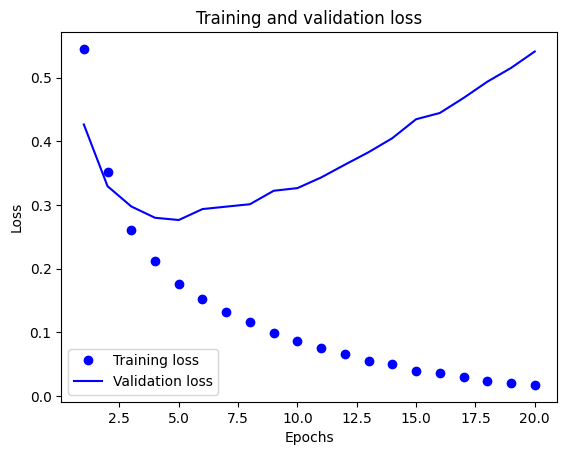

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



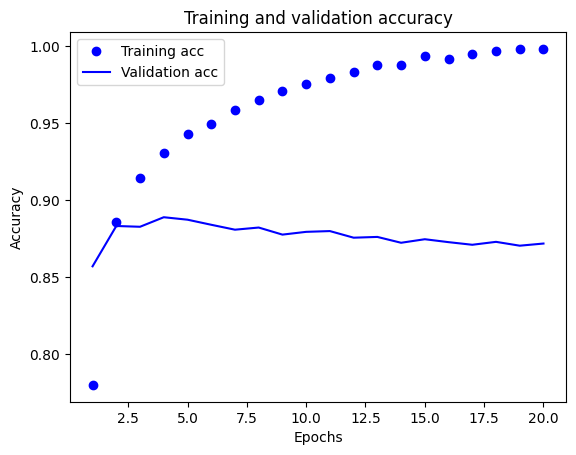

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.02103524],
       [0.9999931 ],
       [0.7195912 ],
       ...,
       [0.00211608],
       [0.00678763],
       [0.8627379 ]], dtype=float32)

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.predict(x_test)